# **------------------------ Introduction------------------------**

* Clustering uses unlabelled data and looks for similarities between clusters(groups) to perform the segmentation of data.

* We don't have labels in clustering. Clustering is trying to discover that label.

* Suppose we have 2 features. **How can we check if it has any groups in it?**

Answer: Simply plot those 2 features and see visually the groups in them.

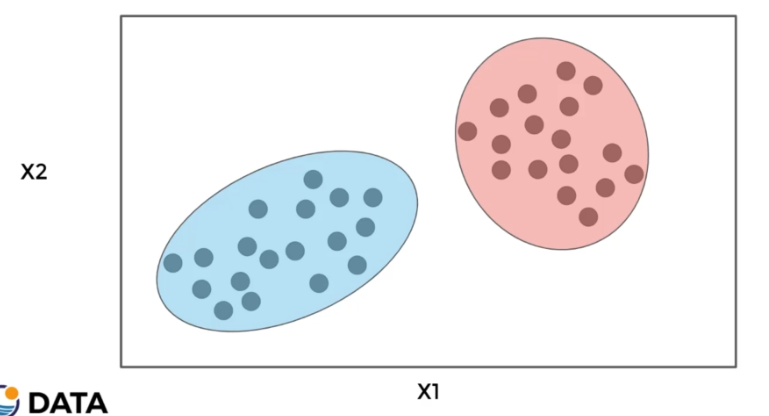


* **How to decide how many clusters are there?**

Answer: Different methods can be used for this. Some methods automatically decide number of clusters or in some methods, used decides manually the number of clusters.

* Keep in mind, clustering doesn't label clusters with some meaningful names. It label them as Cluster 0, Cluster 1 etc.

* If you want, you can later modify these label names as 'cat', 'dog' etc., whatever you want.



* **How can we assign a label to a new data point?**

Answer: We need to calculate the distance of that data point from all clusters. Which cluster has shortest distance from that data point, assign that cluster label to that.

* Choose distance metric based on the features you are having in your dataset.

* Just keep in mind, we are never 100% sure if it is correct label or not.

* So, is trha yh unsupervised learning aik supervised learning bn jaye gi. hmary pas labels ajayen gay. Bs yh eh hmen 100% ni pta hota if these are correct labels or even these clusters are significant.

* Making 2 or 3 clusters is a good idea. But making 100's of clusters is never a good idea.



# **------------------------ Conditions for K-Means Clustering ------------------------**

The following 2 properties must be satisfied by each data point in dataset for K-Means Clustering:

* Each data point must belong to a cluster.

* Each point can only belong to ONE cluster.

## **Algorithm:**

1. Start with unlabelled data (only features):

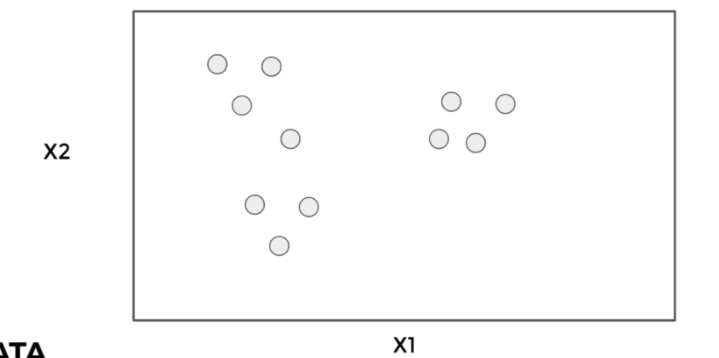



2. Choose the number of clusters you want from your data. This will be K.
Suppose we chose K = 3.

3. Choose K number of random points from dataset. These will be starting points for positioning clusters. These will be called 'Cluster Points'.

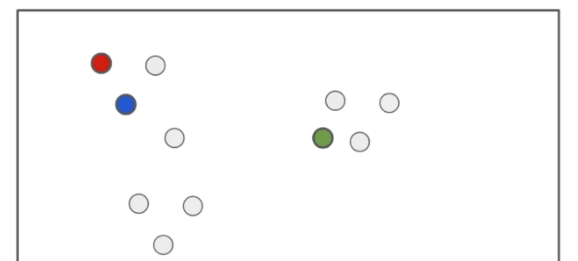

4. Assign each remaining point to the nearest cluster point.

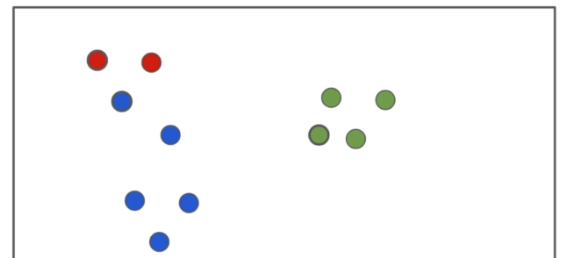

We've got three clusters as we expressed through setting K value as 3.

Now we have everything labelled.

5. Calculate the center of each cluster. We know that each data point is a vector. For example, we have 10 features. Each data point has those 10 values. So, each data point will be a vector or 10 values.

To calculate the center of each cluster we can follow the given approach:

Let's consider a simple example with two features: **Feature A and Feature B.** Suppose we have a cluster with the following data points assigned to it:

DataPoint **|**  Feature A |  Feature B

1 |  3 | 5

2 | 4 | 6

3 | 2 | 7


To calculate the centroid of this cluster, you need to find the mean value of each feature (Feature A and Feature B) across all the data points in the cluster. Here's how you can do it:

Calculate the mean value of Feature A:
Mean Feature A = (3 + 4 + 2) / 3 = 3

Calculate the mean value of Feature B:
Mean Feature B = (5 + 6 + 7) / 3 = 6

So, the centroid of this cluster would be (Mean Feature A = 3, Mean Feature B = 6).

6. Now we will label these centers as rectangles:

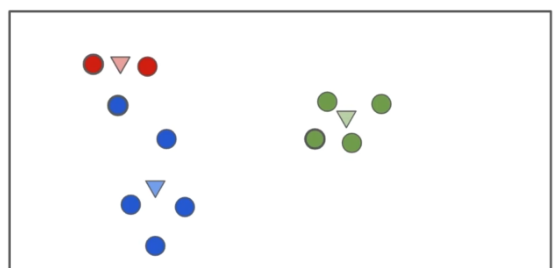



7. Now, relocate each data point to the nearest center.

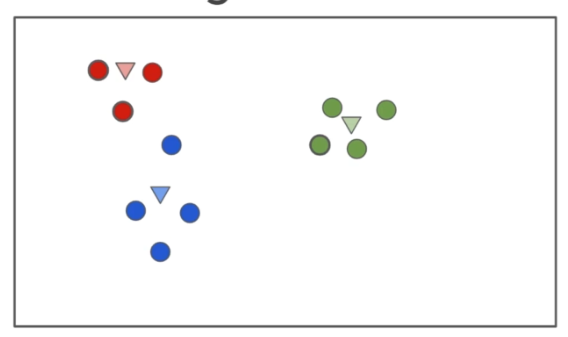

Repeat steps 5, 6, 7 till there is no cluster re-assignment.

# **----------------------- Coding-----------------------**

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('/content/sample_data/bank-full.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Some features are float, some are int and some are object. We can only check the description of numeric columns as:

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In clustering, we don't have labels. To get an idea that how many cluster can be there in our data, we can adopt any of the following method:

1. Contact the person who has gathered the data and has all the information of features.

2. Visualize the data as much that you get to know about the clusters by yourself.

<Axes: xlabel='age', ylabel='Count'>

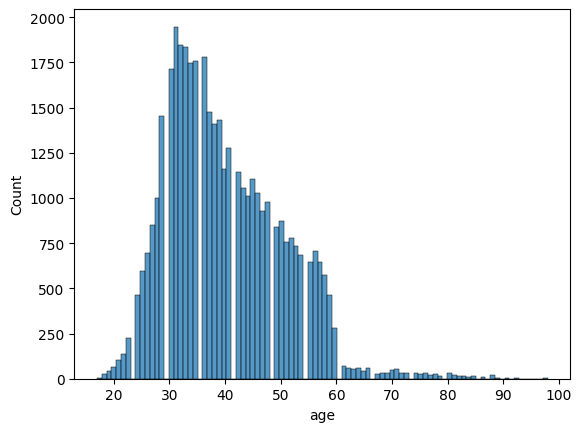

In [7]:
sns.histplot(data= df, x= 'age')

We can most people are between 30 and 40.

To get a more general look, increase the number of bins.

<Axes: xlabel='age', ylabel='Count'>

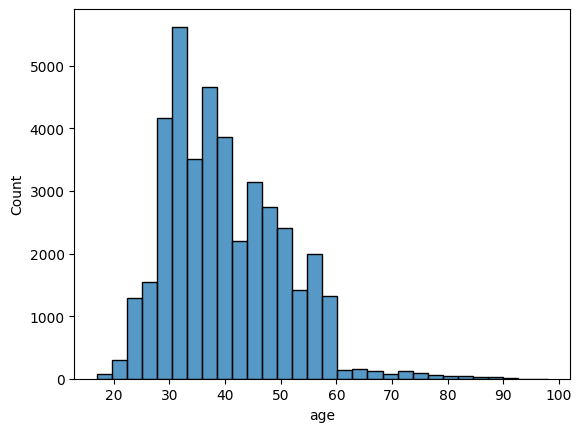

In [8]:
sns.histplot(data = df, x = 'age', bins = 30)

We can see in it that age of people who were marketed by this bank were mostly between 30 and 40.

Let's check if the people between 30 or 40 took the loan or not:

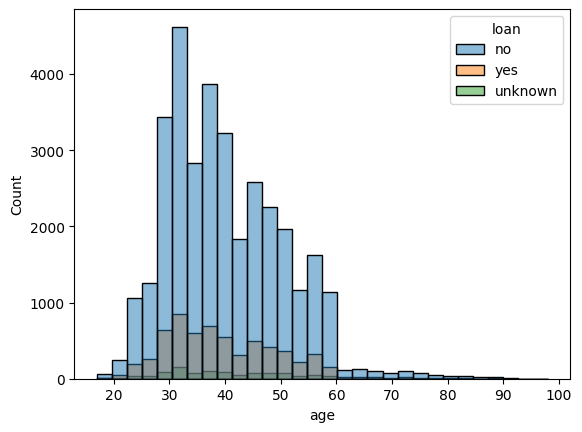

In [10]:
sns.histplot(data = df, x = 'age', bins = 30, hue = 'loan');

It shows majority of people didn't take loan.

It means we should not market to the people who already have loan.

**Info 1: We can cluster the people who didn't take loan.**

Now, lets see if people were contacted after the last compagin.

pdays means number of previous days a person was contacted after the last compaign.

It means mostly people were never contacted by compaign.

999 means never contacted.

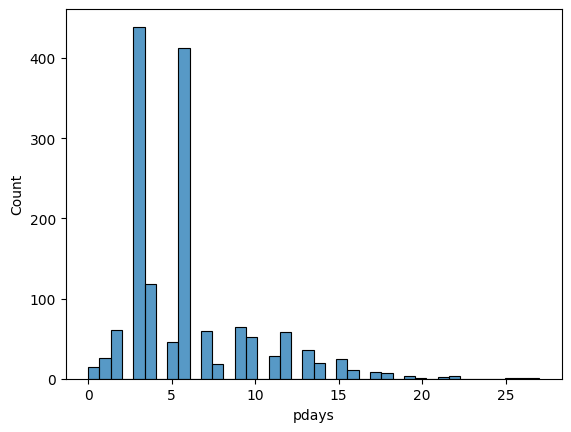

In [19]:
sns.histplot(data = df[df['pdays'] != 999], x = 'pdays', bins = 40);

It means people were either contacted with 3 - 10 days or they were never contacted.

Now , we can check for the people who were contacted, how much longer their contact remained on telephone call.

In [20]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

duration shows for how many seconds the last interaction remained.

In [21]:
df['duration']

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41188, dtype: int64

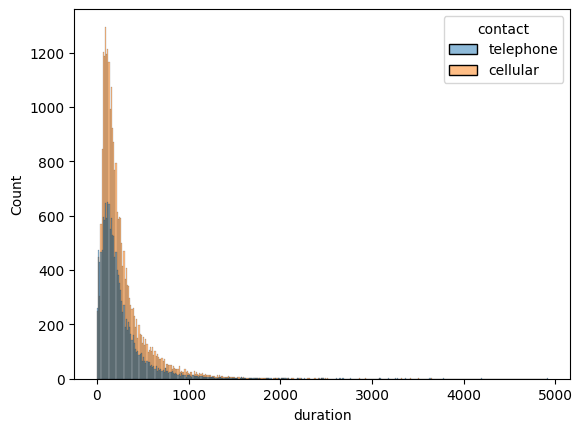

In [24]:
sns.histplot(x = 'duration', data = df, hue = 'contact');

It means mostly people were contacted over cell fone and they remained on call for 1000 seconds = 16 minutes at max.

Now, lets check the categorical data.

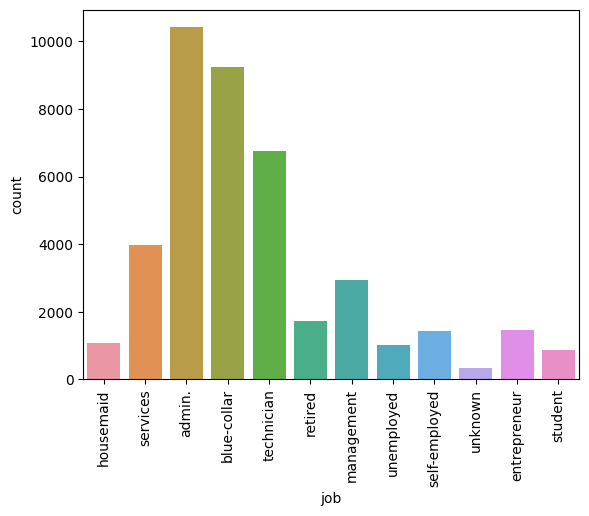

In [26]:
sns.countplot(data = df, x ='job')
plt.xticks(rotation=90);

Mostly people were admin to whome compaign was performed.Most less people were having unknown jobs.

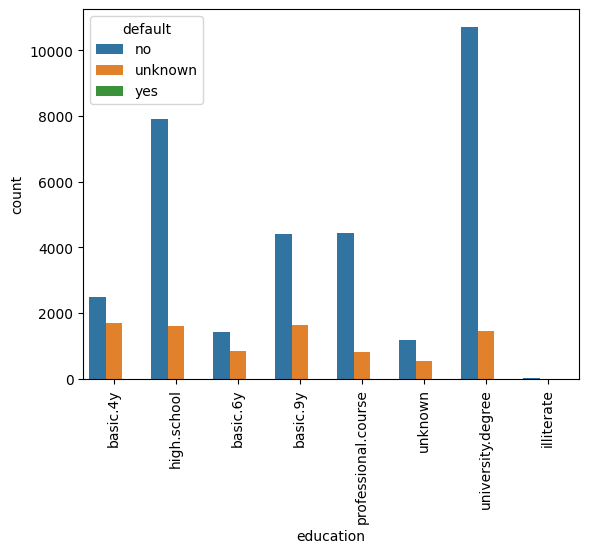

In [29]:
sns.countplot(x = 'education', data = df, hue ='default')
plt.xticks(rotation=90);

Mostly people with university degree, are not gonna default upon taking loan.

# **Model Fitting:**

We know k means clustering calculates distance between points. So, we cant use categorical columns directly. We need to convert them.

In [40]:
X = pd.get_dummies(df)

Due to conversion, some features will not having values as 0 - 1.  Some will have real values like 94, 3095 etc. So its must to scale them.

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

There is no issue of data leakage in it as there is no test data. Unsupervised learning is all about features.

In [42]:
scaled_X = scaler.fit_transform(X)

In [35]:
from sklearn.cluster import KMeans

It has these hyperparameters:

1. **n_clusters:** default= 8. It means k value. This default value 8 is meaningless. It totally depends on data how many clusters we want.

2. **random:** randomly choose any point to initiate.

3. **max_iter:** Some points will keep on running from one cluster to another, so K means clustering can go on forever. So, to avoid this, set max_iter.

4. precompiled_distance: {'auto', 'True', 'False'}

Choose auto always. It is standard distance computing method.


In [38]:
model = KMeans(n_clusters = 2)

Now, we have 4 options:

**1. model.fit:** It will only fit the data for KMeans clustering algorithm.

**2. model.fit_predict:** It will fit the data, then will make clusters and will predict a cluster index (0,1,..) for each data point and return that as well. **Recommended!** Here, predict doesn't mean forecasting. It will just assign clusters to each data point.

**3. model.fit_transform:** It will fit the data and perform transform the dimensionality of the data that we dont need in K means. WE WILL USE IT IN PCA ETC.

**4. model.predict:** To get the cluster of any new data point.

In [43]:
cluster_labels = model.fit_predict(scaled_X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [44]:
cluster_labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

Now, let's join these cluster labels with our dataset.

In [45]:
X['Clusters'] = cluster_labels

In [49]:
X.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

Now let's check how much correlated the features are to the Clusters. So, we can make sure that k =2 was a good choice or not.

In [51]:
X.corr()['Clusters'].sort_values(ascending=False)

Clusters            1.000000
euribor3m           0.959297
emp.var.rate        0.932612
nr.employed         0.886155
cons.price.idx      0.679372
                      ...   
subscribed_yes     -0.294610
month_apr          -0.357923
contact_cellular   -0.410476
poutcome_failure   -0.464295
previous           -0.478467
Name: Clusters, Length: 66, dtype: float64

## **Choosing 'K' value:**

* Once we have decided a k value, we fit the data to algorithm.

**Then**

* We measure the distance between: FROM points TO cluster centers.

* If a cluster is good, all points will be tighlt packed to that cluster and distance will be minimal.

* The better we fit for cluster, the lower the distance 'Sum of squared distance (SSD)' will be.

High k value ==> Lower SSD

How??

When the value of **K (number of clusters) is increased**, it allows for creating more clusters of the data. As a result, **each cluster tends to have fewer data points**, leading to a decrease in the distance between each data point and its assigned cluster center.

Therefore, higher K values in K-means clustering generally lead to a reduction in SSD.

If we say k = number of points in dataset, means all points will become clusters then SSD = 0.

But this is not optimal solution and not recommended. Its better to stop where SSD stop reducing. (Elbow Method)

**Formula to calculate SSD: model.inertia_**



* If we have more than one elbow points, its better to stop at first one. Also, as it is unsupervised so no correct answer.

In [54]:
# ELBOW METHOD APPLIED

SSD = []
for k in range(2,10):

  model = KMeans(n_clusters = k)
  model.fit_predict(scaled_X)

  SSD.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

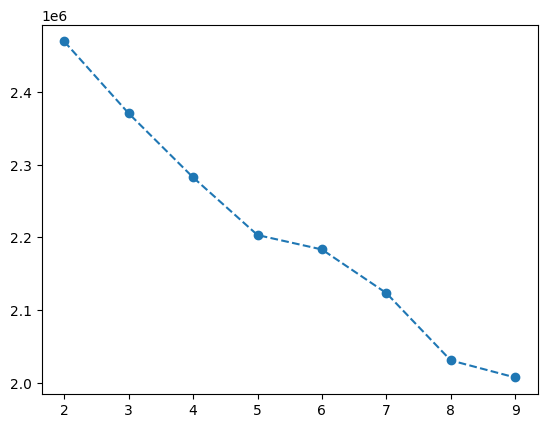

In [56]:
plt.plot(range(2,10), SSD, 'o--');

We can see 6 is a good elbow point.

We can even confirm it with pandas by calculating difference between 2 consecutive values:

In [57]:
pd.Series(SSD).diff()

0             NaN
1   -99005.490417
2   -88139.449852
3   -79332.817894
4   -19866.651760
5   -60031.678507
6   -92669.266714
7   -23501.635425
dtype: float64

Big drop after 6. So choose 6.

